# Exploration of the MNHN mammals dataset

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

- https://science.mnhn.fr/all/search
- https://www.gbif.org/dataset/3959ee49-7678-4a88-9049-5dfc55ccebf3

# Reading data

In [2]:
!ls ../data/gbif_mammals

citations.txt
dataset
meta.xml
metadata.xml
multimedia.txt
occurrence.txt
rights.txt
verbatim.txt


In [42]:
cols = [
    'kingdom',
    'phylum', 
    'class',
    'order',
    'family',
    'genus',
    "species",
]

In [44]:
data = (
    pd.read_csv("../data/gbif_mammals/occurrence.txt",sep = "\t")
    .drop_duplicates(subset = ["species"])
    .fillna("NONE")
)

In [45]:
data.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,...,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
0,2863210302,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,2863210301,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,2823508301,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5,2823497301,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
6,2818944301,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [47]:
data.shape

(2567, 249)

# Data exploration

- https://github.com/anvaka/ngraph.fromdot
- https://github.com/anvaka/ngraph.graph
- https://github.com/anvaka/graph-start
- https://github.com/anvaka/ngraph.pixel
- https://github.com/anvaka/pm


##### Other solution
- https://github.com/vasturiano/3d-force-graph
- https://github.com/vasturiano/react-force-graph

In [51]:
import networkx as nx

In [64]:
G = nx.Graph()

for i,species in data.dropna(subset = cols).iterrows():
    for a,b in list(zip(cols[:-1],cols[1:])):
        na,nb = species[a],species[b]
        G.add_node(na,group = a)
        G.add_node(nb,group = b)
        G.add_edge(na,nb)
#     if i > 100:
#         break

In [65]:
nx.draw(G)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001784596D0D8> (for post_execute):



KeyboardInterrupt



In [71]:
import json

def save_data_as_json(data,json_path,sort_keys = True):
    with open(json_path, 'w') as file:
        json.dump(data, file,indent = 4,sort_keys = sort_keys)


def save_json_graph(G,filepath):
    json_data = nx.node_link_data(G)
    json_data.pop("directed")
    json_data.pop("multigraph")
    json_data.pop("graph")
    save_data_as_json(json_data,filepath)

In [72]:
save_json_graph(G,"mammals_full.json")

In [73]:
!start .

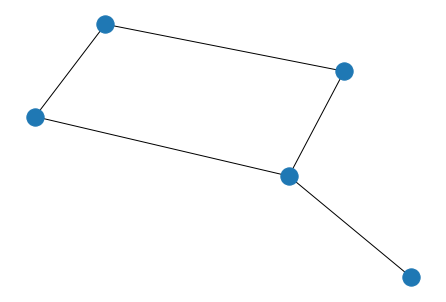

In [36]:
G2 = nx.Graph()
G2.add_edge("A","B")
G2.add_edge("B","C")
G2.add_edge("A","D")
G2.add_edge("D","C")
G2.add_edge("D","E")

nx.draw(G2)

In [39]:
nx.node_link_data(G2)

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'A'}, {'id': 'B'}, {'id': 'C'}, {'id': 'D'}, {'id': 'E'}],
 'links': [{'source': 'A', 'target': 'B'},
  {'source': 'A', 'target': 'D'},
  {'source': 'B', 'target': 'C'},
  {'source': 'C', 'target': 'D'},
  {'source': 'D', 'target': 'E'}]}